In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("BostonHousing.csv")

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.shape

(506, 14)

In [5]:
input_features = df.iloc[:,:-1]
output = df.iloc[:,-1:]

In [6]:
input_features.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [7]:
output.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(input_features, output, random_state = 2, test_size = 0.2)

In [9]:
print(X_train.head())
print(Y_train.head())
print(X_test.head())
print(Y_test.head())


        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
321  0.18159   0.0   7.38     0  0.493  6.376  54.3  4.5404    5  287   
37   0.08014   0.0   5.96     0  0.499  5.850  41.5  3.9342    5  279   
286  0.01965  80.0   1.76     0  0.385  6.230  31.5  9.0892    1  241   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
25   0.84054   0.0   8.14     0  0.538  5.599  85.7  4.4546    4  307   

     ptratio       b  lstat  
321     19.6  396.90   6.87  
37      19.2  396.90   8.77  
286     18.2  341.60  12.93  
2       17.8  392.83   4.03  
25      21.0  303.42  16.51  
     medv
321  23.1
37   21.0
286  20.1
2    34.7
25   13.9
         crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
463   5.82115   0.0  18.10     0  0.713  6.513  89.9  2.8016   24  666   
152   1.12658   0.0  19.58     1  0.871  5.012  88.0  1.6102    5  403   
291   0.07886  80.0   4.95     0  0.411  7.148  27.7  5.1167    4  245   
183   0.10008   0.0   2.4

In [10]:
from sklearn.tree import DecisionTreeRegressor

regressior = DecisionTreeRegressor(criterion = "squared_error", max_depth = 5)

In [11]:
regressior.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=5)

In [12]:
y_predict = regressior.predict(X_test)

[Text(0.4403409090909091, 0.9166666666666666, 'x[12] <= 9.725\nsquared_error = 84.57\nsamples = 404\nvalue = 22.441'),
 Text(0.18181818181818182, 0.75, 'x[5] <= 7.47\nsquared_error = 83.234\nsamples = 167\nvalue = 29.675'),
 Text(0.06818181818181818, 0.5833333333333334, 'x[7] <= 1.485\nsquared_error = 43.52\nsamples = 143\nvalue = 27.085'),
 Text(0.045454545454545456, 0.4166666666666667, 'squared_error = 0.0\nsamples = 5\nvalue = 50.0'),
 Text(0.09090909090909091, 0.4166666666666667, 'x[5] <= 6.722\nsquared_error = 25.381\nsamples = 138\nvalue = 26.254'),
 Text(0.045454545454545456, 0.25, 'x[5] <= 6.125\nsquared_error = 11.226\nsamples = 95\nvalue = 23.843'),
 Text(0.022727272727272728, 0.08333333333333333, 'squared_error = 7.776\nsamples = 25\nvalue = 21.012'),
 Text(0.06818181818181818, 0.08333333333333333, 'squared_error = 8.572\nsamples = 70\nvalue = 24.854'),
 Text(0.13636363636363635, 0.25, 'x[10] <= 18.85\nsquared_error = 15.434\nsamples = 43\nvalue = 31.581'),
 Text(0.113636363

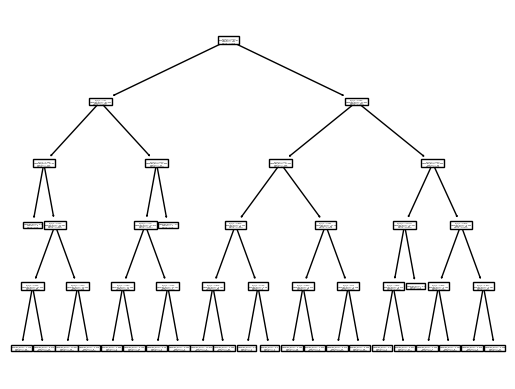

In [13]:
from sklearn.tree import plot_tree

plot_tree(regressior)

In [14]:
from sklearn.metrics import r2_score

print(r2_score(Y_test, y_predict))

0.7345706505656491
